Epoch [10/100], Loss: 1.1959
Epoch [20/100], Loss: 1.0505
Epoch [30/100], Loss: 1.2725
Epoch [40/100], Loss: 1.1131
Epoch [50/100], Loss: 1.1084
Epoch [60/100], Loss: 1.2060
Epoch [70/100], Loss: 1.2884
Epoch [80/100], Loss: 1.3758
Epoch [90/100], Loss: 1.2207
Epoch [100/100], Loss: 1.1062
NAME:JAGANNIVASH U M
REG NO: 212224240059
Test Accuracy: 46.90%
Confusion Matrix:
 [[362 130 100 261]
 [254 190 169 147]
 [138 133 322 106]
 [182  41  43 631]]
Classification Report:
               precision    recall  f1-score   support

           A       0.39      0.42      0.40       853
           B       0.38      0.25      0.30       760
           C       0.51      0.46      0.48       699
           D       0.55      0.70      0.62       897

    accuracy                           0.47      3209
   macro avg       0.46      0.46      0.45      3209
weighted avg       0.46      0.47      0.46      3209

NAME:JAGANNIVASH U M
REG NO: 212224240059


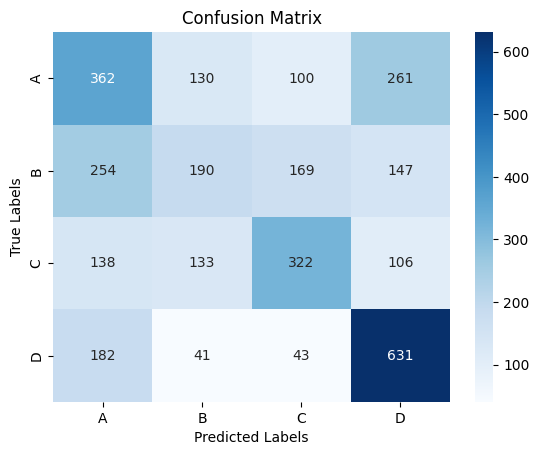

NAME:JAGANNIVASH U M
REG NO: 212224240059
Predicted class for sample input: D
Actual class for sample input: D


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from torch.utils.data import TensorDataset, DataLoader



data = pd.read_csv("/content/customers.csv")
data.head()


data.columns

data = data.drop(columns=["ID"])
data.fillna({"Work_Experience": 0, "Family_Size": data["Family_Size"].median()}, inplace=True)
categorical_columns = ["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score", "Var_1"]
for col in categorical_columns:
    data[col] = LabelEncoder().fit_transform(data[col])



label_encoder = LabelEncoder()
data["Segmentation"] = label_encoder.fit_transform(data["Segmentation"])  # A, B, C, D -> 0, 1, 2, 3


X = data.drop(columns=["Segmentation"])
y = data["Segmentation"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)




train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)




class PeopleClassifier(nn.Module):
    def __init__(self, input_size):
        super(PeopleClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.fc2 = nn.Linear(16, 8)
        #self.fc3 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 4)  # 4 output classes (A, B, C, D)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        #x = F.relu(self.fc3(x))
        x = self.fc3(x)  # No activation, CrossEntropyLoss applies Softmax internally
        return x

model = PeopleClassifier(input_size=X_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


def train_model(model, train_loader, criterion, optimizer, epochs):
  for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


model = PeopleClassifier(input_size=X_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
train_model(model, train_loader, criterion, optimizer, epochs=100)


model.eval()
predictions, actuals = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.numpy())
        actuals.extend(y_batch.numpy())


print("NAME:JAGANNIVASH U M")

print("REG NO: 212224240059")

accuracy = accuracy_score(actuals, predictions)*100
conf_matrix = confusion_matrix(actuals, predictions)
class_report = classification_report(actuals, predictions, target_names=[str(i) for i in label_encoder.classes_])

print(f'Test Accuracy: {accuracy:.2f}%')
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)




print("NAME:JAGANNIVASH U M")

print("REG NO: 212224240059")
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,fmt='g')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()



print("NAME:JAGANNIVASH U M")

print("REG NO: 212224240059")
sample_input = X_test[12].clone().unsqueeze(0).detach().type(torch.float32)
with torch.no_grad():
    output = model(sample_input)
    # Select the prediction for the sample (first element)
    predicted_class_index = torch.argmax(output[0]).item()
    predicted_class_label = label_encoder.inverse_transform([predicted_class_index])[0]

print(f'Predicted class for sample input: {predicted_class_label}')
print(f'Actual class for sample input: {label_encoder.inverse_transform([y_test[12].item()])[0]}')


